__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras


### Desafío - Máquinas de Soporte Vectorial

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

### Descripción
Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predizca de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria. Para más detalles técnicos asociados a la base de datos, pueden hacer click en el [link](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names).

### Ejercicio 1: Preparar el ambiente de trabajo
* Importe todas las librerías a utilizar.
* Excluya las columnas id y Unnamed: 32 de la base de datos.
* Recodifique el vector objetivo diagnosis a numérico para poder procesarlo posteriormente.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import missingno as msngo
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('breast_cancer.csv')
df_original.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df = df_original.copy(deep=True).drop(columns=['id', 'Unnamed: 32'])
display(df.head())
display(df.shape)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 31)

In [12]:
# (M = malignant, B = benign)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
# (1 = malignant, 0 = benign)
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Ejercicio 2: Visualizando la distribución de los atributos
* Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
* Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

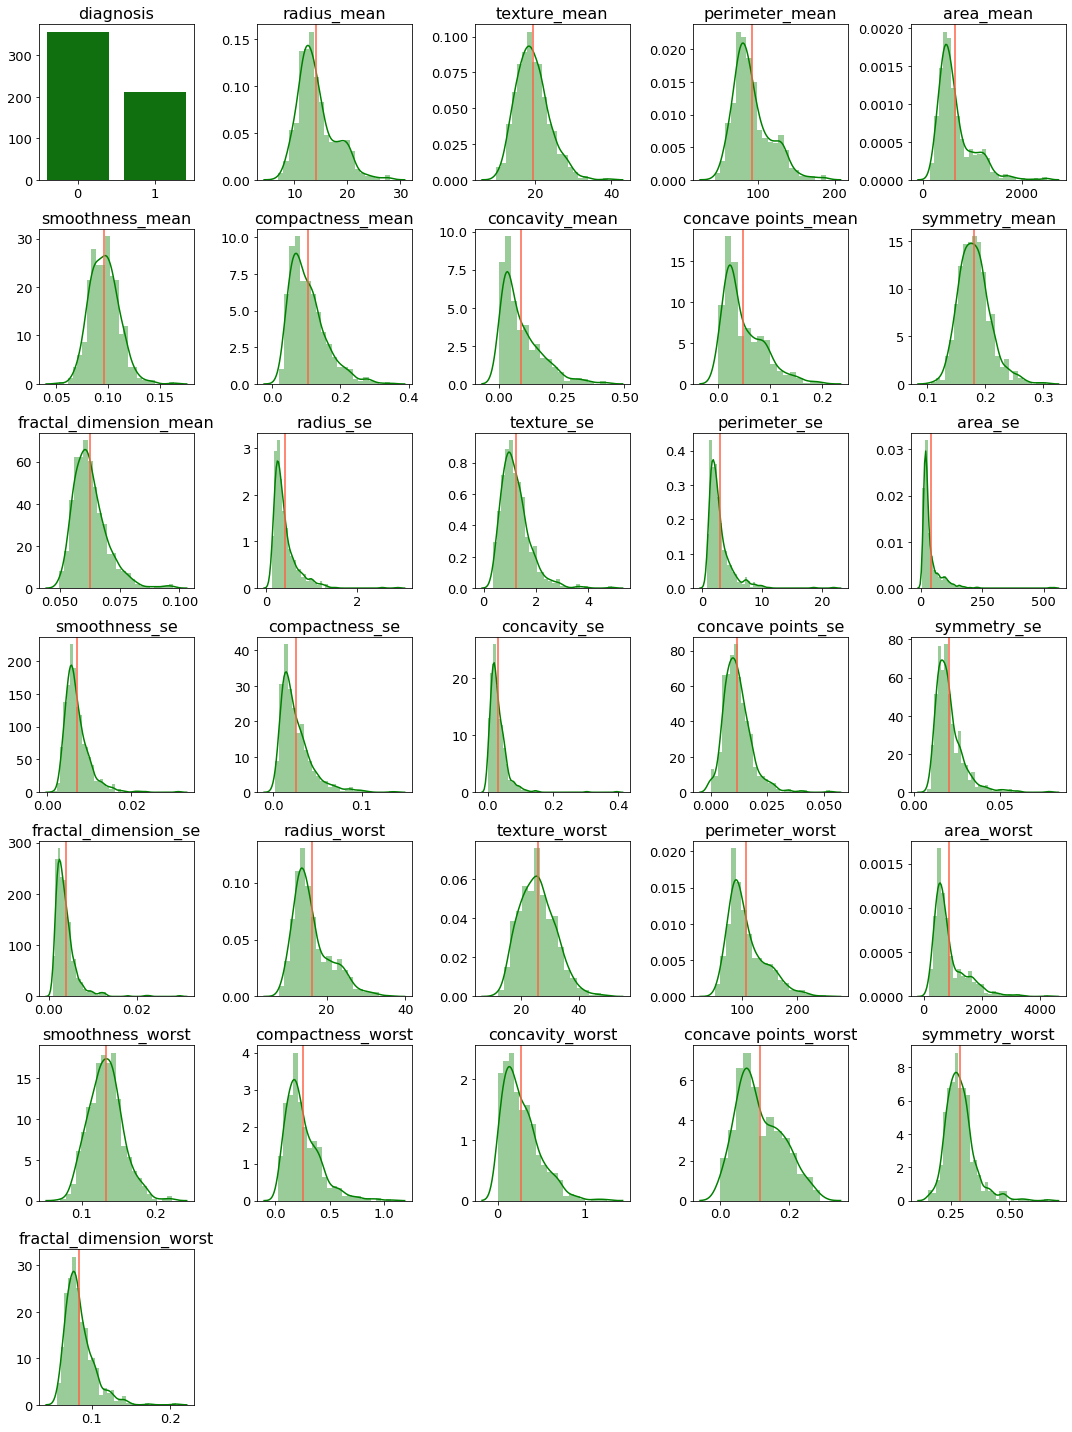

In [14]:
# Análisis descriptivo de cada variable del DF
def plot_hist_frec(df, cols):
    
    plt.figure(figsize=(15,20))
    rows = df.shape[1] / (cols - 1)
    
    for index, (colname, serie) in enumerate(df.iteritems()):
        plt.subplot(rows, cols, index + 1)
        if pd.api.types.is_float_dtype(serie) is True:
            sns.distplot(serie, color='green')
            plt.axvline(np.mean(serie), color='tomato')
        elif pd.api.types.is_integer_dtype(serie) is True:
            sns.countplot(serie, color='green')
        plt.title(colname, fontsize=16)
        plt.xlabel('');plt.ylabel('');plt.tight_layout()
        
plot_hist_frec(df,5)

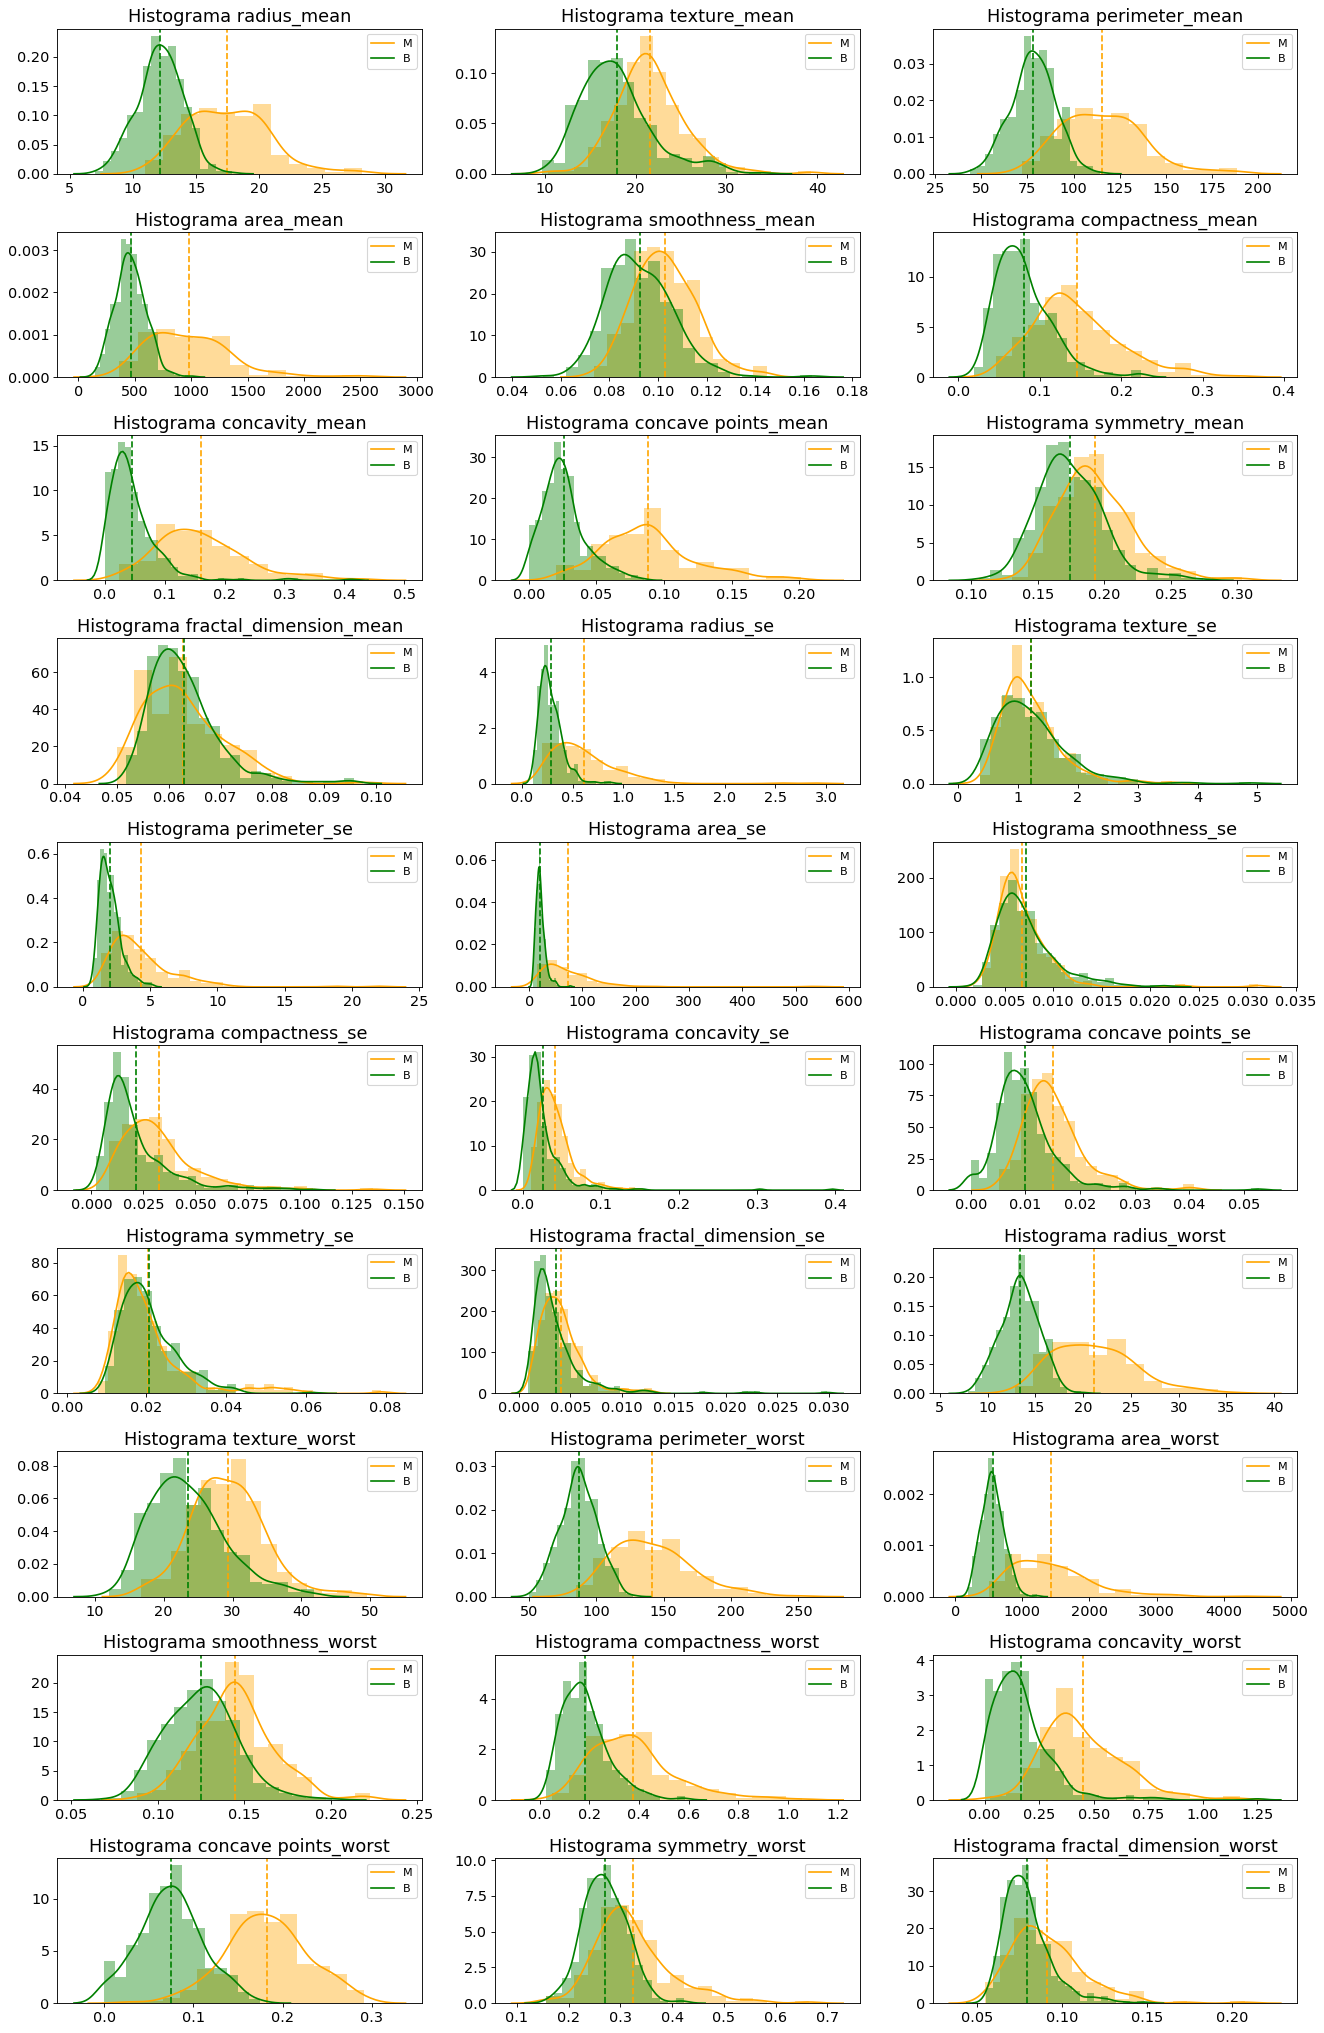

In [15]:
# Análisis de cada variable para cada clsase del vector objetivo
fig = plt.figure(figsize=(20, 100), dpi=80)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
variables = df.loc[:, 'radius_mean':'fractal_dimension_worst'].columns
for index, variable in enumerate(variables):
    ax = fig.add_subplot(len(variables), 3, index + 1)
    sns.distplot(df[df['diagnosis'] == 1][variable],
                 axlabel=False, kde_kws={"label": "M"}, color='orange')
    mean_m = df[df['diagnosis'] == 1][variable].mean()
    ax.axvline(mean_m, linestyle='--', color='orange')
    sns.distplot(df[df['diagnosis'] == 0][variable],
                 axlabel=False, kde_kws={"label": "B"}, color='green')
    mean_b = df[df['diagnosis'] == 0][variable].mean()
    ax.axvline(mean_b, linestyle='--', color='green')
    ax.set_title('Histograma {}'.format(variable), size=16)

Los rasgos que mantienen un similitud en las respectivas clases del vector objetivo son:
* smoothness_mean
* symmetry_mean
* fractal_dimension_mean
* texture_se
* smoothness_se
* symmetry_se
* fratal_dimension_se

### Ejercicio 3: Estimando el porcentaje de overlap en los atributos
Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.
El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

```python
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
        # for a specific attribute
        df[df[target] == unique_value][attribute],
        # define percentage
        bins=perc,
        # limit empirical range for comparison
        range=[empirical_lower_bound, empirical_upper_bound]
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_-1"])
    intersection = np.true_divide(np.sum(get_minima),
    np.sum(tmp_hist_holder["h_-1"]))
    return intersection
```

* La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.
* Utilizando la función, genere un dataframe donde almacenará el nombre del atributo y su porcentaje. Ordene este dataframe de forma descendente y preserve.

In [16]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            df[df[target] == unique_value][attribute],
            # define percentage
            bins=perc,
            # limit empirical range for comparison
            range=[empirical_lower_bound, empirical_upper_bound]
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima),
                                  np.sum(tmp_hist_holder["h_0"]))
    return intersection


histogram_overlap(df, 'smoothness_mean', 'diagnosis', perc=100)

0.5210084033613446

In [17]:
def genera_df_overlap(df):
    attributes = [x for x in df.columns if x != 'diagnosis']
    overlap_perc = []
    for a in attributes:
        overlap_perc.append(
            round(histogram_overlap(df, a, 'diagnosis', perc=100), 2))
    return pd.DataFrame(overlap_perc, index=attributes, columns=['overlap_perc'])


df_overlap_perc = genera_df_overlap(df)
df_overlap_perc.sort_values(by="overlap_perc", ascending=False, inplace=True)
df_overlap_perc.head()

,overlap_perc
fractal_dimension_mean,0.59
fractal_dimension_se,0.59
smoothness_se,0.59
symmetry_se,0.57
texture_se,0.55


Text(0.5, 1.0, 'Porcentaje de overlap por atributo')

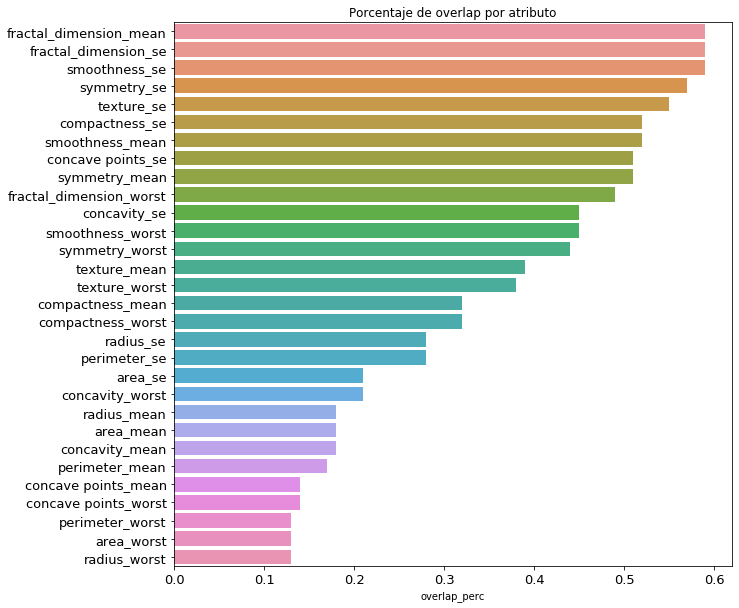

In [10]:
plt.figure(figsize=(10, 10))
barplot_gen = sns.barplot(x=df_overlap_perc.columns[0],
                          y=df_overlap_perc.index,
                          data=df_overlap_perc
                          )
barplot_gen.set_title('Porcentaje de overlap por atributo')

**Nota**: Se puede observar que los atributos con mayor overlap corresponden en general a los atributos con distibuciones más parecidas reportados anteriormente.

### Ejercicio 4: Selección del modelo por GridSearchCV
* Entrene una serie de modelos SVC con los siguientes hiperparámetros:
    C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] .
    gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10] .
    Validaciones cruzadas: 10.
* Genere un heatmap en base a los puntajes estimados con GridSearchCV .
    * tip: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_ .
    
#### Digresión: Un par de elementos a considerar en la implementación de GridSearchCV

Si trabajamos con sklearn.model_selection.GridSearchCV , tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos X_train y y_train a nuestro objeto instanciado y preservando X_test e y_test como una muestra de validación externa. Si tenemos un archivo de testing externo, se recomienda no hacer división.
    
   * El objeto creado con sklearn.model_selection.GridSearchCV sigue la misma funcionalidad de cualquier método de estimación de scikit-learn , con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
        * sklearn.model_selection.GridSearchCV.cv_results_ devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo:
            * split* Indicará la métrica específica en cada validacieon cruzada y combinación de hiperparámetros.
            * *_time Indicará el tiempo de ejecución en cada modelo.
        * Por lo general trabajaremos con mean_test_score y mean_train_score que representa la media de CV para cada combinación de hiperparámetros.
        * sklearn.model_selection.GridSearchCV.best_estimator_ devuelve un modelo listo para entrenar con la mejor combinación de hiperparámetros.
        * sklearn.model_selection.GridSearchCV.best_score_ devuelve el desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá Accuracy , si es un problema de regresión devolverá MSE.
        
* Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente.
* Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de entrenamiento.

In [18]:
# Escalado y división de conjuntos de Train y Test
X_scaled = StandardScaler().fit_transform(
    df.loc[:, 'radius_mean':'fractal_dimension_worst'])
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df['diagnosis'], random_state=11238, test_size=.33)

In [19]:
# Definición de Hiperparámetros
c_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
gamma_param_range = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

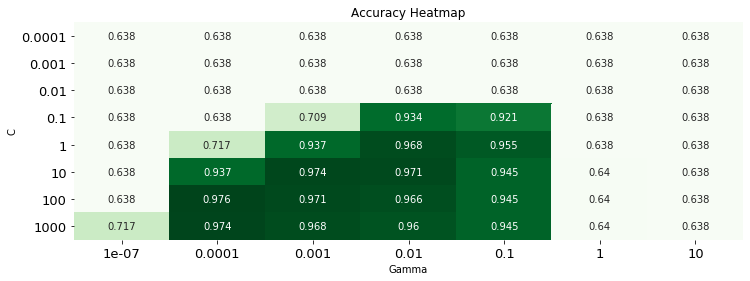

In [21]:
# Manual, sin GridSearchCV
empty_dict = {}
best_score = 0
c_holder = []
for c in c_param_range:
    gamma_holder = []
    for gamma in gamma_param_range:
        tmp_score = cross_val_score(SVC(C=c, gamma=gamma), X_train, y_train, cv=10, n_jobs=-1)
        empty_dict[str("C: {}, Gamma: {}".format(c, gamma))] = list(tmp_score)
        gamma_holder.append(np.mean(tmp_score))
        if np.mean(tmp_score) > best_score:
            best_score = np.mean(tmp_score)
            best_params = str("C: {}, Gamma: {}".format(c, gamma))
    c_holder.append(gamma_holder)
cv_params = np.array(c_holder).reshape(8, 7)

plt.figure(figsize=(12, 4))
grid = GridSpec(1, 2, width_ratios=[2,1])
sns.heatmap(cv_params, annot=True, cmap='Greens', cbar=False, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".3")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap');

In [22]:
# Con GridSearchCV
params = [{'kernel': ['linear', 'rbf', 'poly'],
           'C': c_param_range,
           'gamma': gamma_param_range
           }]
svc_grid = GridSearchCV(SVC(probability=True), params, cv=10)
svc_grid.fit(X_train, y_train)

In [25]:
# Mejor combinación de Hiperparámetros:
svc_grid.best_params_

{'C': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [26]:
# Mejor desempeño promedio del modelo en el testing interno:
round(svc_grid.best_score_,5)

0.97638

In [27]:
df_results = pd.DataFrame(svc_grid.cv_results_)
df_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016309,0.003155,0.000752,0.000101,0.0001,1e-07,linear,"{'C': 0.0001, 'gamma': 1e-07, 'kernel': 'linear'}",0.641026,0.641026,...,0.631579,0.631579,0.631579,0.631579,0.631579,0.648649,0.675676,0.640420,0.012899,103
1,0.020572,0.000323,0.000857,0.000121,0.0001,1e-07,rbf,"{'C': 0.0001, 'gamma': 1e-07, 'kernel': 'rbf'}",0.641026,0.641026,...,0.631579,0.631579,0.631579,0.631579,0.631579,0.648649,0.648649,0.637795,0.006735,113
2,0.015771,0.000244,0.000778,0.000083,0.0001,1e-07,poly,"{'C': 0.0001, 'gamma': 1e-07, 'kernel': 'poly'}",0.641026,0.641026,...,0.631579,0.631579,0.631579,0.631579,0.631579,0.648649,0.648649,0.637795,0.006735,113
3,0.014354,0.000414,0.000670,0.000046,0.0001,0.0001,linear,"{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'line...",0.641026,0.641026,...,0.631579,0.631579,0.631579,0.631579,0.631579,0.648649,0.675676,0.640420,0.012899,103
4,0.019509,0.000458,0.000864,0.000090,0.0001,0.0001,rbf,"{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}",0.641026,0.641026,...,0.631579,0.631579,0.631579,0.631579,0.631579,0.648649,0.648649,0.637795,0.006735,113


Text(0.5, 1, 'Accuracy Heatmap - Linear')

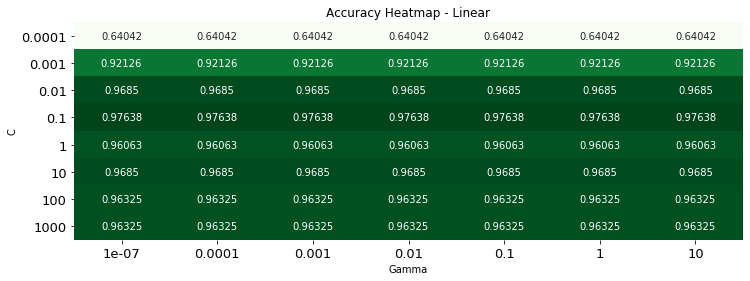

In [28]:
# Reporte métricas con kernel='linear'
df_results_linear = df_results[df_results['param_kernel'] == 'linear'][[
    'param_C', 'param_gamma', 'mean_test_score']].reset_index(drop=True)
#df_results_linear['mean_test_score'] = df_results_linear['mean_test_score'].round(5)

# display(df_results_linear)
scores_matrix_linear = np.array(
    df_results_linear['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_linear, annot=True, cmap='Greens', cbar=False,
            xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap - Linear')

El mejor puntaje con kernel linear es 0.97638 y se da para C=0.1 y Gamma=0.0000001.

Text(0.5, 1, 'Accuracy Heatmap - Rbf')

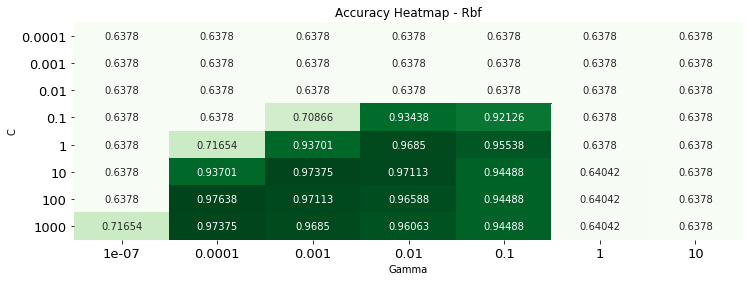

In [29]:
# Reporte métricas con kernel='rbf'
df_results_rbf = df_results[df_results['param_kernel'] == 'rbf'][[
    'param_C', 'param_gamma', 'mean_test_score']].reset_index(drop=True)
#df_results_rbf['mean_test_score'] = df_results_rbf['mean_test_score'].round(4)
# display(df_results_rbf)
scores_matrix_rbf = np.array(df_results_rbf['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_rbf, annot=True, cmap='Greens', cbar=False,
            xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap - Rbf')

El mejor puntaje con kernel rbf es 0.97638 y se da para C=100 y Gamma=0.0001.

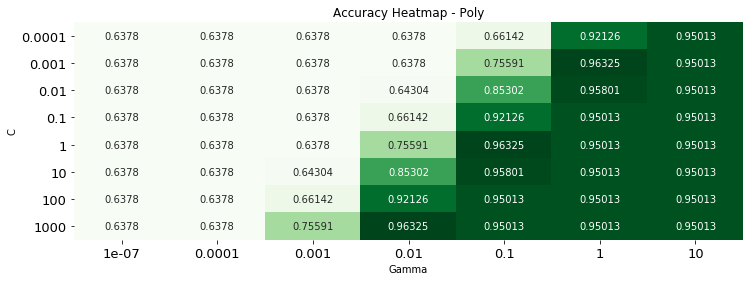

In [30]:
# Reporte métricas con kernel='poly'
df_results_poly = df_results[df_results['param_kernel'] == 'poly'][['param_C','param_gamma','mean_test_score']].reset_index(drop=True)
#df_results_rbf['mean_test_score'] = df_results_rbf['mean_test_score'].round(4)
#display(df_results_rbf)
scores_matrix_poly = np.array(df_results_poly['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_poly, annot=True, cmap='Greens', cbar=False, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap - Poly');

El mejor puntaje con kernel Poly es 0.96325 y se da para C=0.001 y Gamma=1.

### Ejercicio 5: Validación del modelo en el hold-out sample
* Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. 
* Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente

In [31]:
# Se usa el modelo listo para entrenar con la mejor combinación de hiperparámetros
y_hat = svc_grid.best_estimator_.predict(X_test)
y_hat[:20]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [32]:
# Se reporta el accuracy
svc_acc = accuracy_score(y_test, y_hat)
svc_acc

0.9787234042553191

In [33]:
df_cr = pd.DataFrame(classification_report(y_test, y_hat, output_dict=True))
df_cr

,0,1,accuracy,macro avg,weighted avg
f1-score,0.982456,0.972973,0.978723,0.977715,0.978723
precision,0.982456,0.972973,0.978723,0.977715,0.978723
recall,0.982456,0.972973,0.978723,0.977715,0.978723
support,114.000000,74.000000,0.978723,188.000000,188.000000


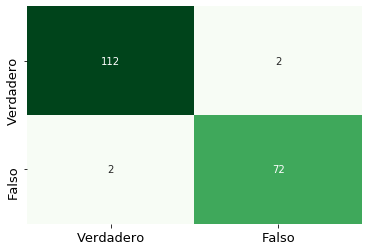

In [34]:
cnf = confusion_matrix(y_test, y_hat)
# Función que convierte MC eb DF


def confusion_to_df(mc):
    mc = mc.T
    df_mc = pd.concat([pd.Series(mc[0]), pd.Series(mc[1])], axis=1)
    df_mc.columns = ['Verdadero', 'Falso']
    df_mc.index = ['Verdadero', 'Falso']
    return df_mc


df_mc = confusion_to_df(cnf)
# display(df_mc.head())

sns.heatmap(df_mc,
            annot=True,
            fmt="d",
            cbar=False,
            cmap='Greens')

Text(0.5, 0, 'Falsos Positivos')

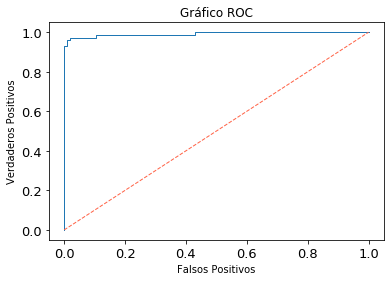

In [35]:
yhat_pr = svc_grid.best_estimator_.predict_proba(X_test)[:, 1]
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], linestyle='--', lw=1, color='tomato')
plt.title('Gráfico ROC')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

In [36]:
# Área bajo la curva ROC
roc_auc_score = roc_auc_score(y_test, y_hat)
roc_auc_score

0.9777145566619251

Según las métricas el modelo en general tiene un muy buen rendimiento, en el contexto de los datos los cuales predicen el cáncer, de los 188 casos lo que preocupa son esos 2 casos en que se dan falsos positivos, es decir, que se predice que la muestra es beninga siendo que era maligna.

### Ejercicio (opcional): Depuración de atributos
* Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.
* Reporte el desempeño del modelo y comente sobre los nuevos hiperparámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

In [37]:
# Atributos con overlap menor a .45
df_overlap_45 = df_overlap_perc[df_overlap_perc['overlap_perc']<.45]
df_overlap_45

,overlap_perc
symmetry_worst,0.44
texture_mean,0.39
texture_worst,0.38
compactness_mean,0.32
compactness_worst,0.32
radius_se,0.28
perimeter_se,0.28
area_se,0.21
concavity_worst,0.21
radius_mean,0.18


In [38]:
X_scaled_45 = StandardScaler().fit_transform(df[list(df_overlap_45.index)])
X_train_45, X_test_45, y_train_45, y_test_45 = train_test_split(
    X_scaled_45, df['diagnosis'], random_state=11238, test_size=.33)

In [39]:
svc_grid_45 = GridSearchCV(SVC(probability=True), params, cv=10)
svc_grid_45.fit(X_train_45, y_train_45)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
# Mejor combinación de Hiperparámetros:
svc_grid_45.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [44]:
# Mejor desempeño promedio del modelo en el testing interno:
round(svc_grid_45.best_score_,5)

0.979

In [45]:
# Se usa el modelo listo para entrenar con la mejor combinación de hiperparámetros
y_hat_45 = svc_grid_45.best_estimator_.predict(X_test_45)

**Accuracy:**

0.9680851063829787

**Classification Report:**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.973684,0.959459,0.968085,0.966572,0.968085
precision,0.973684,0.959459,0.968085,0.966572,0.968085
recall,0.973684,0.959459,0.968085,0.966572,0.968085
support,114.000000,74.000000,0.968085,188.000000,188.000000


**Matriz de Confusión:**

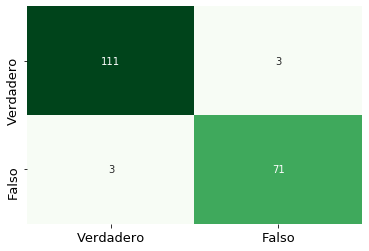

In [46]:
# Se reporta el accuracy
display(Markdown("**Accuracy:**"))
svc_acc_45 = accuracy_score(y_test_45, y_hat_45)
display(svc_acc_45)
display(Markdown("**Classification Report:**"))
df_cr_45 = pd.DataFrame(classification_report(y_test_45, y_hat_45, output_dict=True))
display(df_cr_45)
# Confusion Matrix
display(Markdown("**Matriz de Confusión:**"))
cnf_45 = confusion_matrix(y_test_45, y_hat_45)
df_mc_45 = confusion_to_df(cnf_45)
#display(df_mc_45.head())
sns.heatmap(df_mc_45,
            annot=True,
            fmt="d",
            cbar=False,
            cmap='Greens')


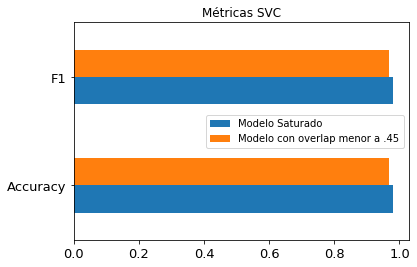

In [47]:
# Se comparan las métricas de cada modelo
data = {'Modelo Saturado': [svc_acc.round(5),
                            df_cr.iloc[0]['weighted avg'].round(5)
                            ],
        'Modelo con overlap menor a .45': [svc_acc_45.round(5),
                                           df_cr_45.iloc[0]['weighted avg'].round(
            5)
]
}
errors_df = pd.DataFrame(data, index=['Accuracy', 'F1'])
# display(errors_df.head())
display(errors_df.plot(title='Métricas SVC', kind='barh'))

**Conclusiones:**
1. Respecto a los hiperparámetros, el cambio más notorio es el del kernel, de 'linear' a 'rfb'.
2. Respecto al desempeño, este baja tanto en accuracy como en f1. En la práctica, al analizar la matriz de confusión, se agregó un falso-positivo y un verdadero-negativo. Más allá de esto, llama la atención que la baja de performance no es tan alta condiderando que se redujo el número de atributos de 30 a 18.